In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [2]:
#Einlesen der Daten
data=pd.read_excel("learn_data1.xlsx")

In [3]:
data

,Unnamed: 0,Time,Signal
0,0,0.000000,0.038001
1,1,0.888889,0.239121
2,2,1.777778,0.407948
3,3,2.666667,0.675464
4,4,3.555556,0.813782
5,5,4.444444,1.002777
6,6,5.333333,1.208085
7,7,6.222222,1.360610
8,8,7.111111,1.690330
9,9,8.000000,2.034608


In [4]:
#definieren der Funktion
def model(x,*args):
    k,d= args[0]

    y=k*x+d
    
    return y

In [39]:
#definieren der Initialwerte für die Parametrisierung
ini_par=1,1

In [36]:
#Aufstellen einer funktion zu berechnung des Errors der minimiert werden soll
def function(ini_par,datax,datay):
    args=ini_par                    #umbennwnwn der initial variablen
    sim=model(datax,args)           #berechnung der simulierten werte
    error=(sim-datay)**2            #subtrahieren der simulirten werte von den gemessenen Werte
    error_sum=np.sum(error)         #Bildung der Summe des Errors
    return error_sum

In [37]:
#ausführen der minimierung ds errors
result=minimize(function,ini_par, args=(data["Time"],data["Signal"]), method='SLSQP')

In [55]:
result

     fun: 0.04305588459207432
     jac: array([2.98023224e-06, 3.69269401e-07])
 message: 'Optimization terminated successfully'
    nfev: 13
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([0.2364416, 0.0013062])

In [56]:
#abspeichern der optimierten modelparametern
opt_value=result.x

In [57]:
#erstellen einer simulierten zeit
sim_time=np.linspace(0,8,1000)

In [48]:
#berechnung der simulierten Werte für die simulierte zeit
sim_values=model(sim_time,opt_value)

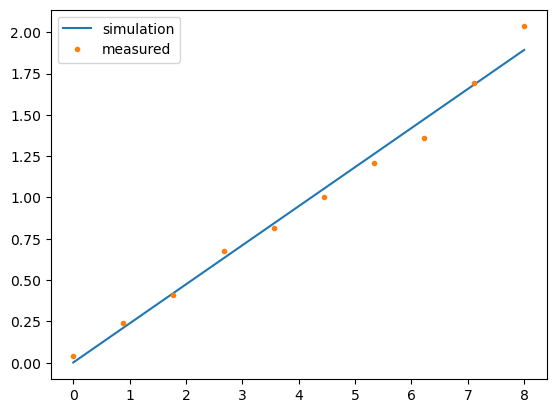

In [53]:
#grafische darstellung der daten
plt.plot(sim_time,sim_values,"-",label="simulation")
plt.plot(data["Time"],data["Signal"],".",label="measured")
plt.legend()